In [1]:
%jsroot off

In [2]:
#include<TFile.h>
#include<TH1.h>
#include<TMath.h>
#include<math.h>
#include<TF1.h>
#include<TLine.h>
#include<TPoint.h>
#include<iostream>
#include<string>
#include<stdio.h>

In [3]:
// gROOT->SetStyle("ATLAS"); // Establecer estilo.
gStyle->SetOptStat(1001110);
gStyle->SetOptFit(1112);

In [4]:
TCanvas *c1 = new TCanvas("c1","The FillRandom example",10,10,900,600);
c1->SetGrid();

In [5]:
const Int_t fit = 6; // Opciones 0, 1, 2, 3, 4, 5, 6 = Distribuciones
const Int_t n = 4; // OJO Modificar

const Double_t max_data = 135;
const Double_t min_data = 110;

TH1D *h_data = new TH1D("h_data","h_data",n,min_data,max_data); // Histograma de datos.

// Para 4:
if (n == 4) {
    h_data->SetBinContent(1, 1);
    h_data->SetBinContent(2, 4);
    h_data->SetBinContent(3, 2);
    h_data->SetBinContent(4, 1);
    //h_data->SetBinError(1, 0.38974303); // Configurar.
    //h_data->SetBinError(2, 0.536510944); // Configurar.
    //h_data->SetBinError(3, 0.529702604); // Configurar.
    //h_data->SetBinError(4, 0.642001867); // Configurar.
}

// Para 5:
if (n == 5) {
    h_data->SetBinContent(1, 1);
    h_data->SetBinContent(2, 0);
    h_data->SetBinContent(3, 10);
    h_data->SetBinContent(4, 3);
    h_data->SetBinContent(5, 2);
}

// Para 6:
if (n == 6) {  
    h_data->SetBinContent(1, 1);
    h_data->SetBinContent(2, 0);
    h_data->SetBinContent(3, 8);
    h_data->SetBinContent(4, 5);
    h_data->SetBinContent(5, 2);
    h_data->SetBinContent(6, 2);
}

// Para 7:
if (n == 7) {  
    h_data->SetBinContent(1, 1);
    h_data->SetBinContent(2, 0);
    h_data->SetBinContent(3, 1);
    h_data->SetBinContent(4, 6);
    h_data->SetBinContent(5, 4);
    h_data->SetBinContent(6, 0);
    h_data->SetBinContent(7, 2);
}

In [6]:
Double_t myBWDist(Double_t* x, Double_t* par)
{   // Double_t x, Double_t mean, Double_t gamma
    return par[0]*TMath::BreitWigner(x[0], par[1], par[2]);
}

In [7]:
Double_t myChisquareDist(Double_t* x, Double_t* par) {
       if ((x[0]-par[2]) <  0) {
          return 0.0;
       }
       Double_t a = par[1]/2 -1.;
       // let return inf for case x  = x0 and treat special case of r = 2 otherwise will return nan
       if (x[0] == par[2] && a == 0) return 0.5;
 
       return par[0]*(std::exp ((par[1]/2 - 1) * std::log((x[0]-par[2])/2) - (x[0]-par[2])/2 - ROOT::Math::lgamma(par[1]/2))/2);
}

In [8]:
Double_t myGammaDist(Double_t* x, Double_t* par) {
    if ((x[0]-par[2]) < 0) {
        return 0.0;
    } else if ((x[0]-par[2]) == 0) {
        if (par[0] == 1) {
            return par[3]*(1.0/par[1]);
        } else {
            return 0.0;
        }
    } else if (par[0] == 1) {
        return  par[3]*(std::exp(-(x[0]-par[2])/par[1])/par[1]);
    } else {
        return par[3]*(std::exp((par[0] - 1) * std::log((x[0]-par[2])/par[1]) - (x[0]-par[2])/par[1] - ROOT::Math::lgamma(par[0]))/par[1]);
    }
}

In [9]:
Double_t myCauchyDist(Double_t* x, Double_t* par)
{   // Double_t x, Double_t t, Double_t s
    // t is the location parameter
    // s is the scale parameter
    return par[0]*TMath::CauchyDist(x[0],par[1],par[2]);
}

 FCN=8 FROM HESSE     STATUS=FAILED         11 CALLS         131 TOTAL
                     EDM=0    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -8.48518e+04   1.41421e+00   0.00000e+00   0.00000e+00
   2  p1           1.00000e+00   1.41421e+00   0.00000e+00   0.00000e+00
   3  p2           1.00000e+00   1.41421e+00   0.00000e+00   0.00000e+00


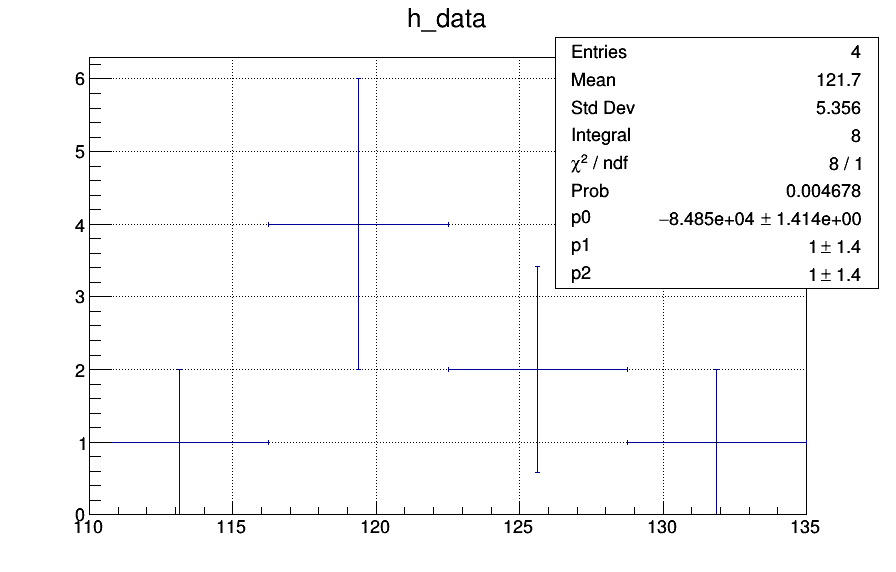

In [10]:
h_data->Draw("E1"); // E1: Para representar los puntos con barras de error.

if (fit == 0) {
    TF1 *pdf = new TF1("pdf","[0]*(2*sqrt(2)*[2]*[1]*(sqrt(pow([2],2)*(pow([2],2)+pow([1],2))))/(TMath::Pi()*sqrt(pow([2],2)+(sqrt(pow([2],2)*(pow([2],2)+pow([1],2)))))))/((pow((pow(x,2)-pow([2],2)),2))+(pow([2],2)*pow([1],2)))",min_data,max_data); //Función de Densidad de Probabilidad.
    pdf->SetParameters(1,h_data->GetStdDev(),h_data->GetMean());
    pdf->SetParNames ("Constant","Mean","Gamma");
}
if (fit == 1) TF1 *pdf = new TF1("pdf","gaus",min_data,max_data);
if (fit == 2) TF1 *pdf = new TF1("pdf","landau",min_data,max_data);
if (fit == 3) {
    TF1 *pdf = new TF1("pdf","myBWDist",min_data,max_data,3);
    pdf->SetParameters(1,1,1);
    //pdf->SetParameters(1,h_data->GetStdDev(),h_data->GetMean());
    //pdf->FixParameter(1,h_data->GetMean());
    //pdf->FixParameter(2,h_data->GetStdDev());
    //pdf->SetParLimits(1,122.0,125.0);
    //pdf->SetParLimits(2,1,2);
    pdf->SetParNames ("Constant","Mean","Gamma");
}
if (fit == 4) {
    TF1 *pdf = new TF1("pdf","myGammaDist",min_data,max_data,4);
    pdf->SetParameters(1,1,1,1);
    //pdf->SetParNames ("Constant","Mean","Gamma");
}
if (fit == 5) {
    TF1 *pdf = new TF1("pdf","myCauchyDist",min_data,max_data,3);
    pdf->SetParameters(1,1,1);
    //pdf->SetParNames ("Constant","Mean","Gamma");
}
if (fit == 6) {
    TF1 *pdf = new TF1("pdf","myChisquareDist",min_data,max_data,3);
    pdf->SetParameters(1,1,1);
    //pdf->SetParNames ("Constant","Mean","Gamma");
}

h_data->Fit("pdf","R");
pdf->SetTitle("Fit");

//Histograma que representa la PDF. Toma los cortes en x de los centros de los bines y los evalua en la PDF para obtener la altura de los bines.
TH1F *h_data_f = new TH1F("h_data_f","Test random numbers",n,min_data,max_data);
for (int i=1; i<n+1; i++) h_data_f->SetBinContent(i,pdf->Eval(h_data->GetXaxis()->GetBinCenter(i)));
//h_data_f->Draw("SAME E1");
c1->Draw();

In [11]:
// TFile myfile("fillrandom.root","RECREATE");
// pdf->Write();
// h_data_f->Write();

In [12]:
//apply the chi2 test and retrieve the residuals
Double_t res[n], x[n];
h_data->Chi2Test(h_data_f,"UU P",res);

Chi2 = -0.000000, Prob = 0, NDF = 3, igood = 2


Info in <TH1D::Chi2TestX>: There is a bin in h2 with less than 1 event.



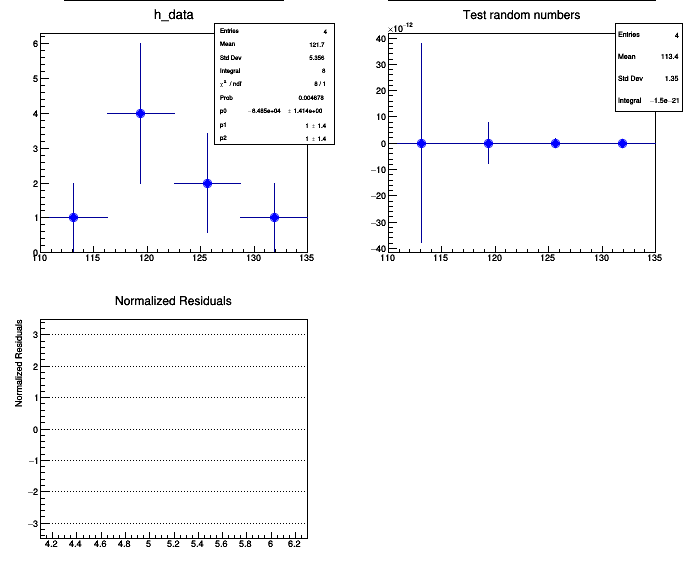

In [13]:
//Graph for Residuals
for (Int_t i=0; i<n; i++) x[i]= 4.+i*12./20.+12./40.;
TGraph *resgr = new TGraph(n,x,res);
resgr->GetXaxis()->SetRangeUser(4,16);
resgr->GetYaxis()->SetRangeUser(-3.5,3.5);
resgr->GetYaxis()->SetTitle("Normalized Residuals");
resgr->SetMarkerStyle(21);
resgr->SetMarkerColor(2);
resgr->SetMarkerSize(.9);
resgr->SetTitle("Normalized Residuals");
 
//Quantile-Quantile plot
TF1 *f = new TF1("f","TMath::Gaus(x,0,1)",-10,10);
TGraphQQ *qqplot = new TGraphQQ(n,res,f);
qqplot->SetMarkerStyle(20);
qqplot->SetMarkerColor(2);
qqplot->SetMarkerSize(.9);
qqplot->SetTitle("Q-Q plot of Normalized Residuals");
 
//create Canvas
TCanvas *c2 = new TCanvas("c2","Chistat Plot",10,10,700,600);
c2->Divide(2,2);
 
// Draw Histogramms and Graphs
c2->cd(1);
h_data->SetMarkerColor(4);
h_data->SetMarkerStyle(20);
 
h_data->Draw("E");
 
c2->cd(2);
h_data_f->Draw("E");
h_data_f->SetMarkerColor(4);
h_data_f->SetMarkerStyle(20);
 
c2->cd(3);
gPad->SetGridy();
resgr->Draw("APL");
 
c2->cd(4);
qqplot->Draw("AP");
 
c2->cd(0);

c2->Draw();
c2->Update();

Esqueleto del código:
https://root.cern/doc/v610/fillrandom_8C.html

Ejemplo aplicación Chi2:
https://root.cern/doc/v610/chi2test_8C_source.html
http://www.hep.by/root/TH1.html#TH1:Chi2Test
http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.173.6388&rep=rep1&type=pdf
https://arxiv.org/pdf/physics/0605123.pdf

Funciones pruebas de bondad:
KolmogorovTest
Chi2Test

Información sobre histogramas y ajustes con ROOT:
http://hadron.physics.fsu.edu/~skpark/document/ROOT/RootLecture/RootLecture290305.pdf